Bibliotecas

In [3]:
import pandas as pd
import seaborn as sns                       
import matplotlib.pyplot as plt

Carregamento dos dados

In [4]:
def load_datasets(portfolio_path, profile_path, transcript_path):

    portfolio = pd.read_json(portfolio_path, orient='records', lines=True)
    profile = pd.read_json(profile_path, orient='records', lines=True)
    transcript = pd.read_json(transcript_path, orient='records', lines=True)
    
    return portfolio, profile, transcript

In [5]:
portfolio, profile, transcript = load_datasets('data/portfolio.json', 'data/profile.json', 'data/transcript.json')

In [6]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [7]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [8]:
transcript.head(10)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


Mudando a coluna time de horas para dias

In [9]:
transcript['time'] = transcript['time'] / 24

In [10]:
transcript[transcript['person'] == 'e2127556f4f64592b11af22de27a7932']

,person,event,value,time
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.00
20283,e2127556f4f64592b11af22de27a7932,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.75
102635,e2127556f4f64592b11af22de27a7932,transaction,{'amount': 17.88},12.00
103834,e2127556f4f64592b11af22de27a7932,transaction,{'amount': 21.43},12.25
110830,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},14.00
150600,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},17.00
171209,e2127556f4f64592b11af22de27a7932,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},17.50
201574,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},21.00
225059,e2127556f4f64592b11af22de27a7932,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},21.75
225060,e2127556f4f64592b11af22de27a7932,transaction,{'amount': 18.42},21.75


Pré-processamento dos dados

In [11]:
#Expande a coluna 'value' para as colunas offer_id e amount
def expand_transcript(transcript):

    df = transcript.copy()
    value_expanded = pd.json_normalize(df['value'])

    df = pd.concat([df.drop(columns='value'), value_expanded], axis=1)
    df['offer_id'] = df.get('offer id', pd.NA).fillna(df.get('offer_id'))

    return df

#Unindo a base transcript com a base portfolio
def merge_with_portfolio(transcript_exp, portfolio):

    df = pd.merge(transcript_exp, portfolio, left_on='offer_id', right_on='id', how='left')

    return df

In [12]:
transcript_exp = expand_transcript(transcript)
raw_data = merge_with_portfolio(transcript_exp, portfolio)

Criando a base de ofertas

In [13]:
#Base de ofertas recebidas
offers = raw_data[raw_data['event'] == 'offer received'].copy()
offers = offers.rename(columns={'time': 'received_time'})

Engenharia de características

In [14]:
#Base com as informações das transações
def extract_transactions(transcript_exp):

    df = transcript_exp[transcript_exp['event'] == 'transaction'].copy()
    df = df[['person', 'time', 'amount']]

    return df

#Criação das variáveis com informações do cliente até o tempo da oferta
def calculate_pre_offer_features(offers, transactions):

    transactions = transactions.rename(columns={'time': 'tx_time'})

    #Repete cada linha de oferta para todas as transações da mesma pessoa
    merged = offers[['person', 'offer_id', 'received_time']].merge(
        transactions,
        on='person',
        how='left'
    )

    #Filtra apenas transações que ocorreram antes da oferta
    merged = merged[merged['tx_time'] < merged['received_time']]

    #Agrupa e calcula as variáveis
    agg = merged.groupby(['person', 'offer_id', 'received_time']).agg(
        pre_offer_avg_spend=('amount', 'mean'),
        pre_offer_num_tx=('amount', 'count'),
        last_tx_time=('tx_time', 'max')
    ).reset_index()

    #Calcula tempo desde última transação
    agg['pre_offer_time_since_last_tx'] = agg['received_time'] - agg['last_tx_time']
    agg.drop(columns='last_tx_time', inplace=True)

    return agg


In [15]:
transactions = extract_transactions(transcript_exp)

In [16]:
agg = calculate_pre_offer_features(offers, transactions)
offers = offers.merge(agg, on=['person', 'offer_id', 'received_time'], how='left')

In [17]:
offers.head()

,person,event,received_time,offer id,amount,offer_id,reward_x,reward_y,channels,difficulty,duration,offer_type,id,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"[web, email, mobile]",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,"[web, email]",20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0.0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"[web, email, mobile, social]",10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,"[web, email, mobile, social]",10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


Vamos criar agora nossa variável target, nesse caso se a oferta foi ou não concluída.

Para isso, vamos pegar o intervalo [received_time, received_time + duration] e ver o menor completed_time de mesmo person e offer_id que esteja no intervalo.

In [18]:
def add_target_column(offers_df, raw_data):

    offers = offers_df.copy()
    completed = raw_data[raw_data['event'] == 'offer completed'].copy()
    completed = completed.rename(columns={'time': 'completed_time'})

    offers['valid_until'] = offers['received_time'] + offers['duration']

    #Unindo as bases de offer
    merged = offers.merge(
        completed[['person', 'offer_id', 'completed_time']],
        on=['person', 'offer_id'],
        how='left'
    )

    #Filtrando completed_times no intervalo
    valid_completions = merged[
        (merged['completed_time'] >= merged['received_time']) &
        (merged['completed_time'] <= merged['valid_until'])
    ]

    #Agrupa por pessoa + oferta recebida e pega o primeiro completed_time
    min_completed = valid_completions.groupby(
        ['person', 'offer_id', 'received_time']
    )['completed_time'].min().reset_index()

    #Junta novamente na base original
    offers = offers.merge(
        min_completed,
        on=['person', 'offer_id', 'received_time'],
        how='left'
    )

    offers['offer_completed'] = offers['completed_time'].notna().astype(int)
    offers.drop(['valid_until', 'completed_time'], axis=1, inplace=True)

    return offers

In [19]:
offers = add_target_column(offers, raw_data)

In [20]:
offers[offers['person'] == 'e2127556f4f64592b11af22de27a7932']

,person,event,received_time,offer id,amount,offer_id,reward_x,reward_y,channels,difficulty,duration,offer_type,id,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx,offer_completed
2,e2127556f4f64592b11af22de27a7932,offer received,0.0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,0
25321,e2127556f4f64592b11af22de27a7932,offer received,14.0,3f207df678b143eea3cee63160fa8bed,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0.0,"[web, email, mobile]",0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,19.655,2.0,1.75,0
38034,e2127556f4f64592b11af22de27a7932,offer received,17.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"[web, email, mobile]",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,19.655,2.0,4.75,1
50812,e2127556f4f64592b11af22de27a7932,offer received,21.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"[web, email, mobile, social]",10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,19.655,2.0,8.75,1


Unindo com a base profile

In [21]:
data = pd.merge(offers, profile, how='left', left_on='person', right_on='id')

In [22]:
data.head()

,person,event,received_time,offer id,amount,offer_id,reward_x,reward_y,channels,difficulty,...,id_x,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx,offer_completed,gender,age,id_y,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"[web, email, mobile]",5.0,...,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,"[web, email]",20.0,...,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,0,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0.0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"[web, email, mobile]",10.0,...,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,0,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"[web, email, mobile, social]",10.0,...,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,0,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,"[web, email, mobile, social]",10.0,...,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,0,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN


Tirando informações da variável membership_date

Vamos criar as variáveis mês e ano de criação, e tempo desde a criação

In [23]:
def extract_membership_month_year(df, date_col='became_member_on'):

    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], format='%Y%m%d')
    df['membership_year'] = df[date_col].dt.year
    df['membership_month'] = df[date_col].dt.month
    
    df.drop([date_col], axis=1, inplace=True)

    return df

In [24]:
data = extract_membership_month_year(data)

In [25]:
data.head()

,person,event,received_time,offer id,amount,offer_id,reward_x,reward_y,channels,difficulty,...,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx,offer_completed,gender,age,id_y,income,membership_year,membership_month
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"[web, email, mobile]",5.0,...,NaN,NaN,NaN,1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5
1,a03223e636434f42ac4c3df47e8bac43,offer received,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,"[web, email]",20.0,...,NaN,NaN,NaN,0,None,118,a03223e636434f42ac4c3df47e8bac43,NaN,2017,8
2,e2127556f4f64592b11af22de27a7932,offer received,0.0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"[web, email, mobile]",10.0,...,NaN,NaN,NaN,0,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,4
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"[web, email, mobile, social]",10.0,...,NaN,NaN,NaN,0,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,2017,9
4,68617ca6246f4fbc85e91a2a49552598,offer received,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,"[web, email, mobile, social]",10.0,...,NaN,NaN,NaN,0,None,118,68617ca6246f4fbc85e91a2a49552598,NaN,2017,10


In [26]:
def define_target_variable(df):

    df = df.copy()
    df['valid_until'] = df['received_time'] + df['duration']
    df['offer_completed'] = (
        (df['completed_time'] >= df['received_time']) &
        (df['completed_time'] <= df['valid_until'])
    ).astype(int)
    
    return df

Limpeza de variáveis que repetidas/que não serão mais utilizadas

In [27]:
drop_cols = ['event', 'offer_id', 'person', 'last_tx_time', 'amount', 'reward_x', 'offer id', 'id_x', 'id_y']
data.drop(columns=[col for col in drop_cols if col in data.columns], inplace=True)

Base de dados

In [28]:
data.head(10)

,received_time,reward_y,channels,difficulty,duration,offer_type,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx,offer_completed,gender,age,income,membership_year,membership_month
0,0.0,5.0,"[web, email, mobile]",5.0,7.0,bogo,NaN,NaN,NaN,1,F,75,100000.0,2017,5
1,0.0,5.0,"[web, email]",20.0,10.0,discount,NaN,NaN,NaN,0,None,118,NaN,2017,8
2,0.0,2.0,"[web, email, mobile]",10.0,7.0,discount,NaN,NaN,NaN,0,M,68,70000.0,2018,4
3,0.0,2.0,"[web, email, mobile, social]",10.0,10.0,discount,NaN,NaN,NaN,0,None,118,NaN,2017,9
4,0.0,10.0,"[web, email, mobile, social]",10.0,5.0,bogo,NaN,NaN,NaN,0,None,118,NaN,2017,10
5,0.0,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,NaN,NaN,NaN,1,M,65,53000.0,2018,2
6,0.0,3.0,"[web, email, mobile, social]",7.0,7.0,discount,NaN,NaN,NaN,0,None,118,NaN,2017,8
7,0.0,0.0,"[web, email, mobile]",0.0,4.0,informational,NaN,NaN,NaN,0,M,58,51000.0,2017,11
8,0.0,5.0,"[web, email]",20.0,10.0,discount,NaN,NaN,NaN,0,F,61,57000.0,2017,9
9,0.0,5.0,"[web, email]",20.0,10.0,discount,NaN,NaN,NaN,0,F,62,71000.0,2016,2


Análisando as variáveis

<Axes: xlabel='age', ylabel='Count'>

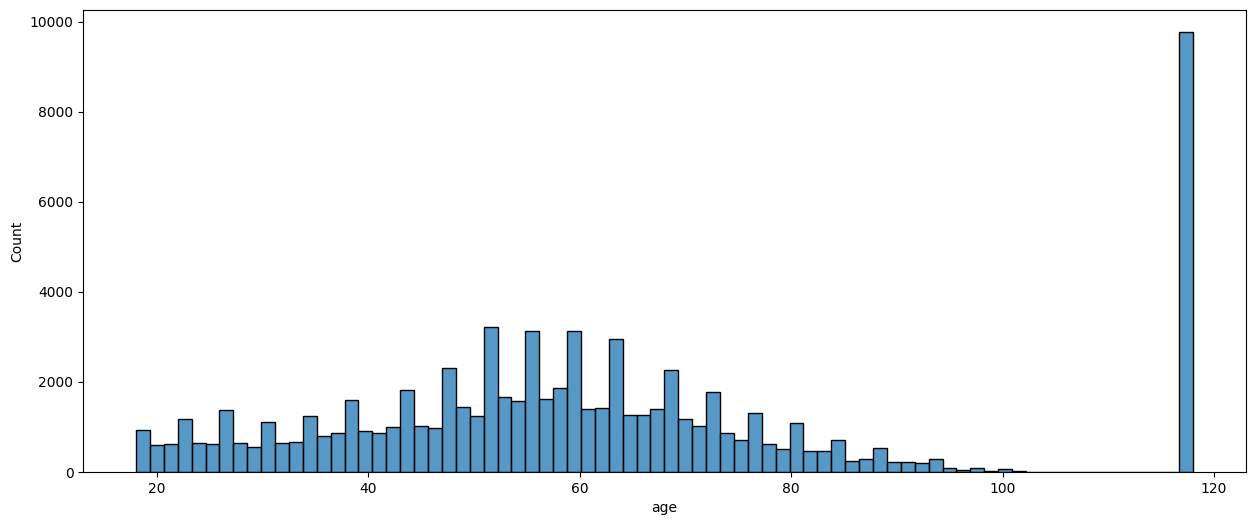

In [29]:
plt.figure(figsize=(15,6))
sns.histplot(data=data, x='age')

<Axes: xlabel='income', ylabel='Count'>

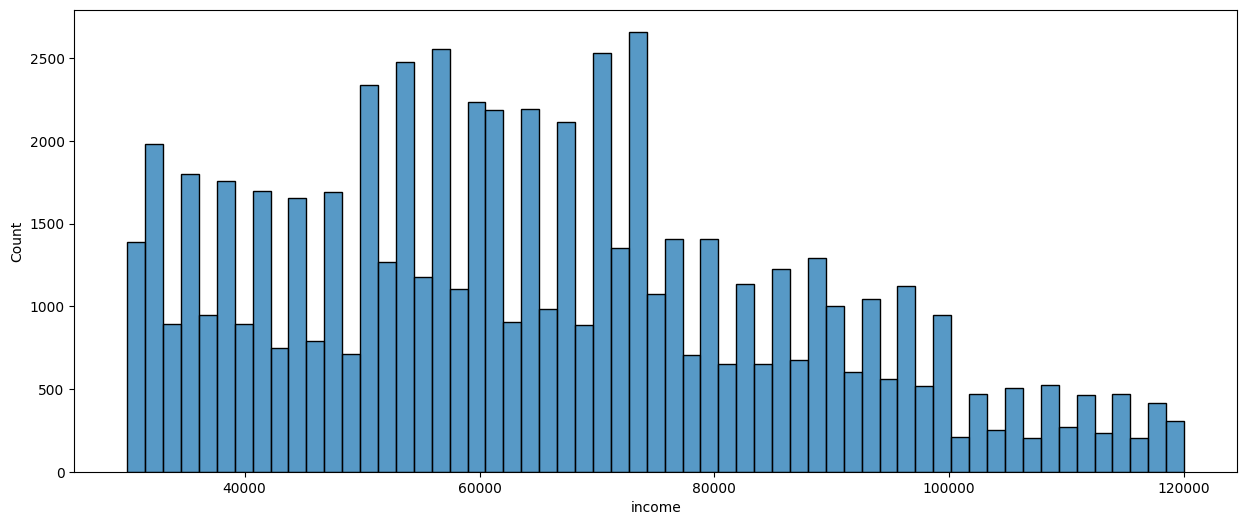

In [30]:
plt.figure(figsize=(15,6))
sns.histplot(data=data, x='income')

Separar base transcript pelas transações

/tmp/ipykernel_49362/581629909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='offer_type', palette="viridis")


<Axes: xlabel='offer_type', ylabel='count'>

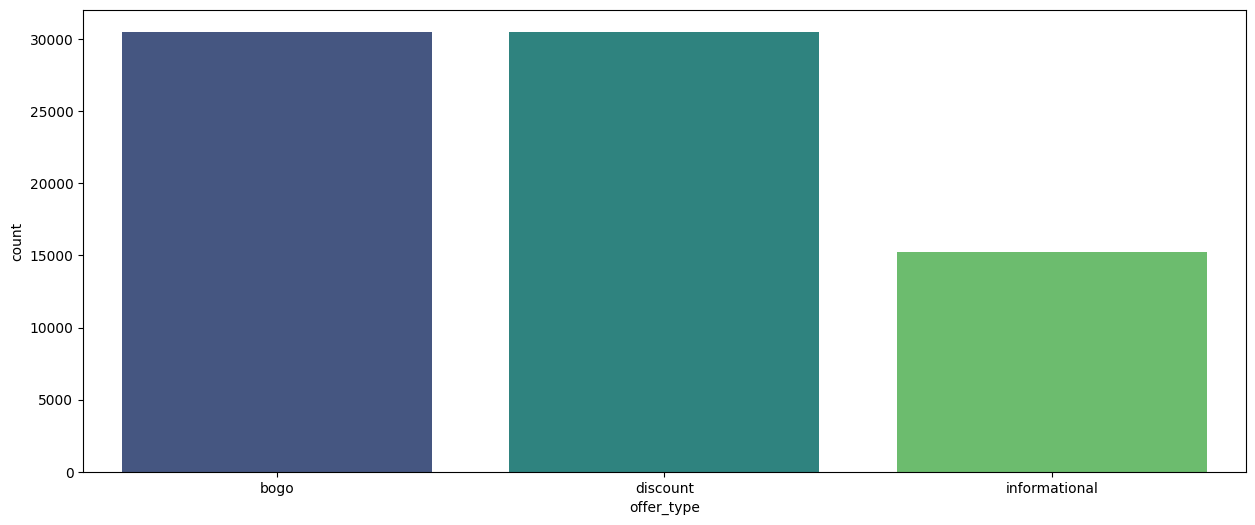

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='offer_type', palette="viridis")

Valores missing

In [32]:
# Gráfico com porcentagem de valores ausentes (somente colunas com algum valor ausente)
def plot_missing_percent(df):

    #Calcular percentual de missing por coluna
    missing_pct = df.isna().mean() * 100
    missing_pct = missing_pct[missing_pct > 0]

    #Verificar se há valores ausentes
    if missing_pct.empty:
        print("Nenhuma coluna com valores ausentes")
        return

    #Plotar gráfico
    plt.figure(figsize=(10, 6))
    missing_pct.sort_values(ascending=False).plot(kind='bar')

    plt.title('Percentual de valores ausentes por coluna')
    plt.ylabel('% de valores ausentes')
    plt.xlabel('Colunas')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

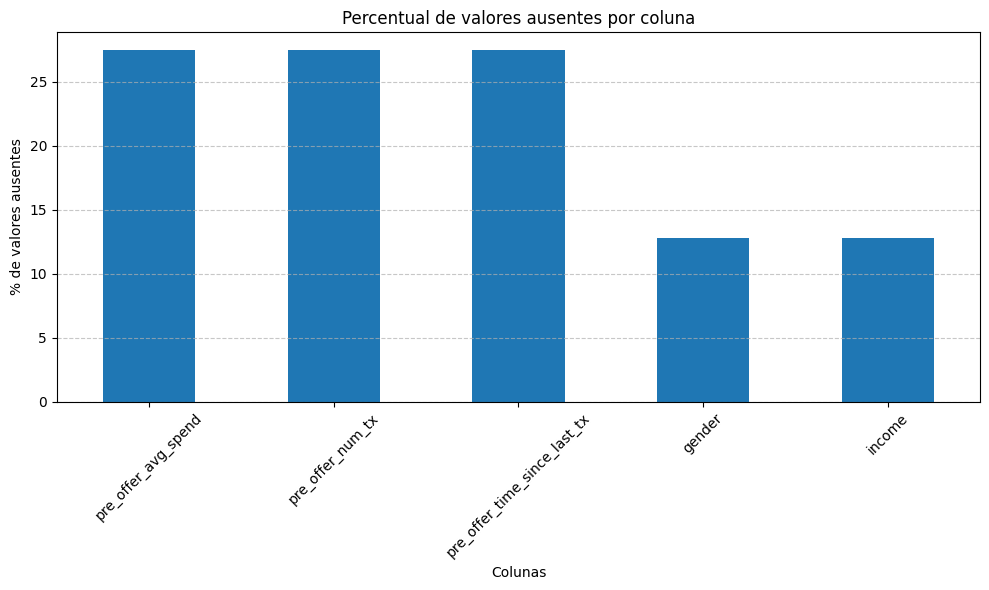

In [33]:
plot_missing_percent(data)

Ajustando dados missing do perfil dos usuários

A princípio vamos usar uma imputação simples pela mediana para age e income, e uma variável age_missing e income_missing que vai flaggar se o dado era ou não missing originalmente (0/1). 

Quando prosseguirmos com as análises, e estivermos avaliando os modelos vamos testar outras possibilidades mais complexas como regressão.

Para variável gender vamos considerar os missings como uma classe em si (por ser uma variável categórica)

In [34]:
def preprocess_profile_data(df):
    df = df.copy()

    #Age
    age_missing_mask = df['age'] == 118
    df['age_missing'] = age_missing_mask.astype(int)
    age_median = df.loc[~age_missing_mask, 'age'].median()
    df.loc[age_missing_mask, 'age'] = age_median

    #Income
    income_missing_mask = df['income'].isna()
    df['income_missing'] = income_missing_mask.astype(int)
    df['income'] = df['income'].fillna(df['income'].median())

    #Gender
    df['gender'] = df['gender'].fillna('missing')

    return df

In [35]:
data = preprocess_profile_data(data)

In [36]:
data.head()

,received_time,reward_y,channels,difficulty,duration,offer_type,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx,offer_completed,gender,age,income,membership_year,membership_month,age_missing,income_missing
0,0.0,5.0,"[web, email, mobile]",5.0,7.0,bogo,NaN,NaN,NaN,1,F,75,100000.0,2017,5,0,0
1,0.0,5.0,"[web, email]",20.0,10.0,discount,NaN,NaN,NaN,0,missing,55,64000.0,2017,8,1,1
2,0.0,2.0,"[web, email, mobile]",10.0,7.0,discount,NaN,NaN,NaN,0,M,68,70000.0,2018,4,0,0
3,0.0,2.0,"[web, email, mobile, social]",10.0,10.0,discount,NaN,NaN,NaN,0,missing,55,64000.0,2017,9,1,1
4,0.0,10.0,"[web, email, mobile, social]",10.0,5.0,bogo,NaN,NaN,NaN,0,missing,55,64000.0,2017,10,1,1


/tmp/ipykernel_49362/3881476723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='age_missing', palette="viridis")


<Axes: xlabel='age_missing', ylabel='count'>

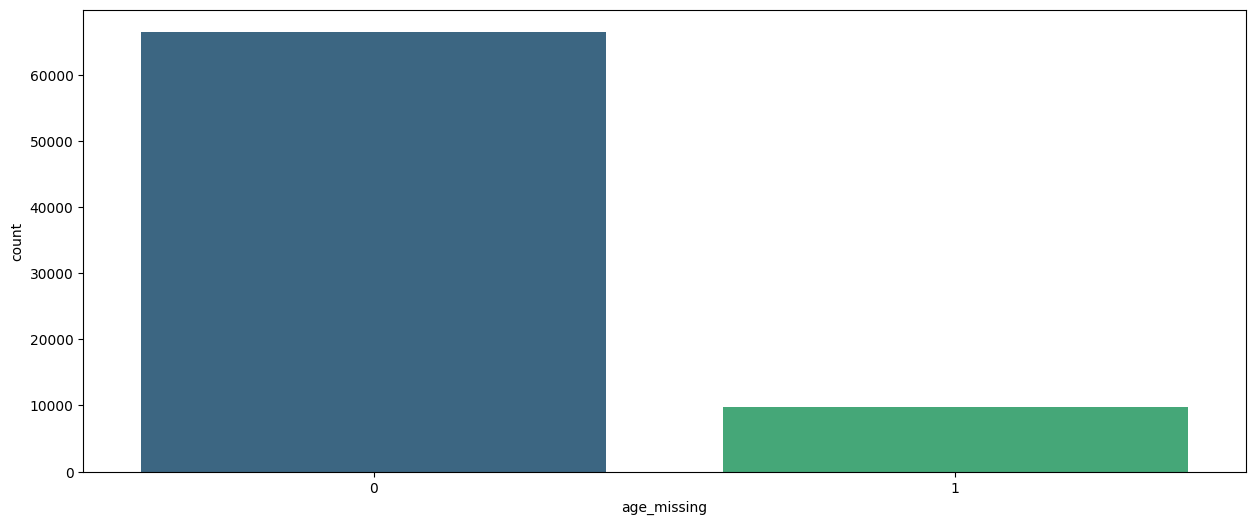

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='age_missing', palette="viridis")

Agora temos também que lidar com a variável channels, optamos aqui por 'explodir' a variável em colunas com 0 e 1 identificando se o canal em questão foi ou não utilizado para a oferta em questão.

In [38]:
data['channels']

0                [web, email, mobile]
1                        [web, email]
2                [web, email, mobile]
3        [web, email, mobile, social]
4        [web, email, mobile, social]
                     ...             
76272         [email, mobile, social]
76273            [web, email, mobile]
76274    [web, email, mobile, social]
76275         [email, mobile, social]
76276            [web, email, mobile]
Name: channels, Length: 76277, dtype: object

In [39]:
def encode_channels(df):

    exploded = df[['channels']].explode('channels')
    dummies = pd.get_dummies(exploded['channels'], prefix='channel')
    dummies_grouped = dummies.groupby(exploded.index).sum()

    df = pd.concat([df.drop(columns='channels'), dummies_grouped], axis=1)
    
    return df

In [40]:
data = encode_channels(data)

In [41]:
data.head()

,received_time,reward_y,difficulty,duration,offer_type,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx,offer_completed,gender,age,income,membership_year,membership_month,age_missing,income_missing,channel_email,channel_mobile,channel_social,channel_web
0,0.0,5.0,5.0,7.0,bogo,NaN,NaN,NaN,1,F,75,100000.0,2017,5,0,0,1,1,0,1
1,0.0,5.0,20.0,10.0,discount,NaN,NaN,NaN,0,missing,55,64000.0,2017,8,1,1,1,0,0,1
2,0.0,2.0,10.0,7.0,discount,NaN,NaN,NaN,0,M,68,70000.0,2018,4,0,0,1,1,0,1
3,0.0,2.0,10.0,10.0,discount,NaN,NaN,NaN,0,missing,55,64000.0,2017,9,1,1,1,1,1,1
4,0.0,10.0,10.0,5.0,bogo,NaN,NaN,NaN,0,missing,55,64000.0,2017,10,1,1,1,1,1,1


Missings das novas features: 

No caso de média de gasto e número de transações, vamos trocar o NaN por 0, pois o gasto médio e o total de transações se não feita nenhuma transação é zero. 

Para o caso do tempo desde a última transação, a princípio vamos colocar como -1, indicando a ausência de referência.

Além disso, vamos criar uma flag 0 ou 1 para indicar ausência de histórico de transações.

In [42]:
def pre_offer_missing(df):
    df = df.copy()

    #Flag de ausência de histórico
    df['no_pre_tx'] = df['pre_offer_num_tx'].isna().astype(int)

    #Substituindo os missing
    df['pre_offer_avg_spend'] = df['pre_offer_avg_spend'].fillna(0)
    df['pre_offer_num_tx'] = df['pre_offer_num_tx'].fillna(0)
    df['pre_offer_time_since_last_tx'] = df['pre_offer_time_since_last_tx'].fillna(-1)

    return df

In [43]:
data = pre_offer_missing(data)

In [44]:
data.head()

,received_time,reward_y,difficulty,duration,offer_type,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx,offer_completed,gender,...,income,membership_year,membership_month,age_missing,income_missing,channel_email,channel_mobile,channel_social,channel_web,no_pre_tx
0,0.0,5.0,5.0,7.0,bogo,0.0,0.0,-1.0,1,F,...,100000.0,2017,5,0,0,1,1,0,1,1
1,0.0,5.0,20.0,10.0,discount,0.0,0.0,-1.0,0,missing,...,64000.0,2017,8,1,1,1,0,0,1,1
2,0.0,2.0,10.0,7.0,discount,0.0,0.0,-1.0,0,M,...,70000.0,2018,4,0,0,1,1,0,1,1
3,0.0,2.0,10.0,10.0,discount,0.0,0.0,-1.0,0,missing,...,64000.0,2017,9,1,1,1,1,1,1,1
4,0.0,10.0,10.0,5.0,bogo,0.0,0.0,-1.0,0,missing,...,64000.0,2017,10,1,1,1,1,1,1,1


In [45]:
plot_missing_percent(data)

Nenhuma coluna com valores ausentes


<Axes: xlabel='received_time', ylabel='Count'>

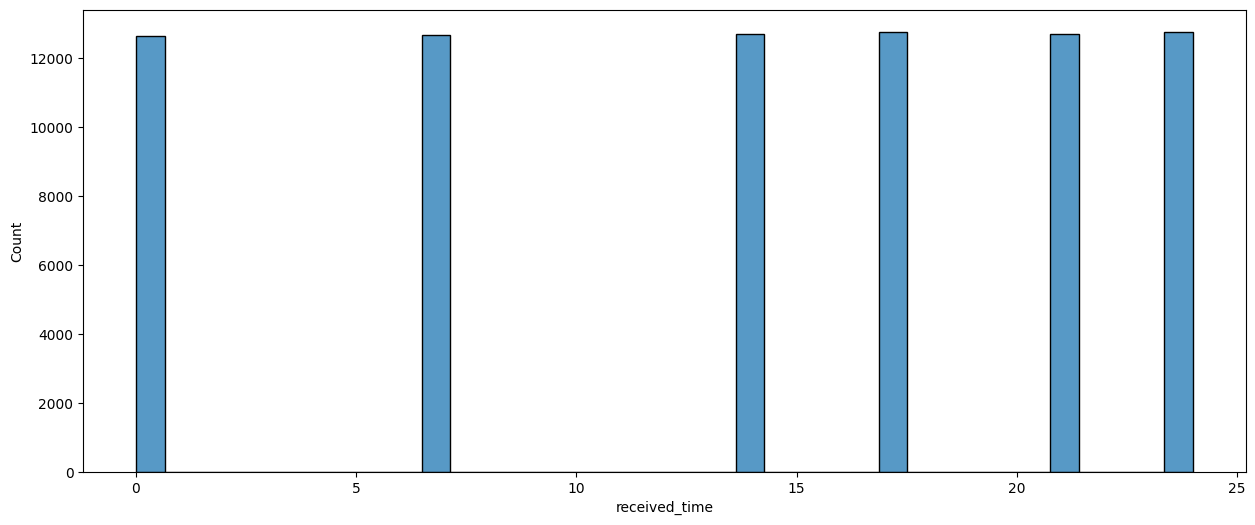

In [46]:
plt.figure(figsize=(15,6))
sns.histplot(data=data, x='received_time')

/tmp/ipykernel_49362/2544116972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='reward_y', palette="viridis")


<Axes: xlabel='reward_y', ylabel='count'>

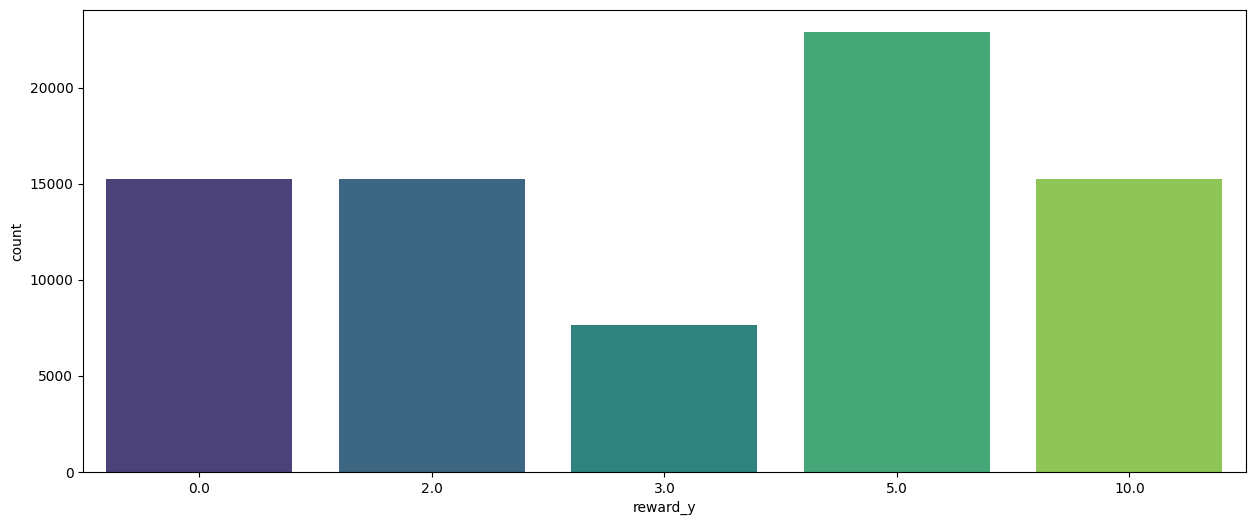

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='reward_y', palette="viridis")

In [49]:
data.columns

Index(['received_time', 'reward_y', 'difficulty', 'duration', 'offer_type',
       'pre_offer_avg_spend', 'pre_offer_num_tx',
       'pre_offer_time_since_last_tx', 'offer_completed', 'gender', 'age',
       'income', 'membership_year', 'membership_month', 'age_missing',
       'income_missing', 'channel_email', 'channel_mobile', 'channel_social',
       'channel_web', 'no_pre_tx'],
      dtype='object')

In [50]:
data.head()

,received_time,reward_y,difficulty,duration,offer_type,pre_offer_avg_spend,pre_offer_num_tx,pre_offer_time_since_last_tx,offer_completed,gender,...,income,membership_year,membership_month,age_missing,income_missing,channel_email,channel_mobile,channel_social,channel_web,no_pre_tx
0,0.0,5.0,5.0,7.0,bogo,0.0,0.0,-1.0,1,F,...,100000.0,2017,5,0,0,1,1,0,1,1
1,0.0,5.0,20.0,10.0,discount,0.0,0.0,-1.0,0,missing,...,64000.0,2017,8,1,1,1,0,0,1,1
2,0.0,2.0,10.0,7.0,discount,0.0,0.0,-1.0,0,M,...,70000.0,2018,4,0,0,1,1,0,1,1
3,0.0,2.0,10.0,10.0,discount,0.0,0.0,-1.0,0,missing,...,64000.0,2017,9,1,1,1,1,1,1,1
4,0.0,10.0,10.0,5.0,bogo,0.0,0.0,-1.0,0,missing,...,64000.0,2017,10,1,1,1,1,1,1,1


In [52]:
categ_vals = ['gender', 'offer_type']
numeric_vals = ['received_time', 'reward_y', 'difficulty', 'duration', 'pre_offer_avg_spend', 'pre_offer_num_tx', 'pre_offer_time_since_last_tx'
                , 'membership_year', 'membership_month', 'age', 'income', 'duration']
extra_vals = ['age_missing', 'income_missing', 'channel_email', 'channel_mobile', 'channel_social', 'channel_web', 'no_pre_tx']

Transformação das variáveis categoricas com get_dummies, escalonamento nas variáveis contínuas

In [53]:
from sklearn.preprocessing import StandardScaler

def get_model_data(df, categorical_features, numeric_features, extra_features=None, target_col='offer_completed'):
    
    df = df.copy()
    
    #One-hot encoding
    df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
    
    #Escalonar variáveis contínuas
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df[numeric_features]),
        columns=numeric_features,
        index=df.index
    )
    
    #Outras variáveis não transformadas
    if extra_features:
        df_extra = df[extra_features]
    else:
        df_extra = pd.DataFrame(index=df.index)  # vazio

    #Juntar tudo
    X = pd.concat([df_encoded, df_scaled, df_extra], axis=1)
    
    #Target
    y = df[target_col]

    return X, y

In [54]:
X, y = get_model_data(
    data,
    categorical_features=categ_vals,
    numeric_features=numeric_vals,
    extra_features=extra_vals
)

Variáveis explicativas transformadas

In [55]:
X

,gender_M,gender_O,gender_missing,offer_type_discount,offer_type_informational,received_time,reward_y,difficulty,duration,pre_offer_avg_spend,...,age,income,duration,age_missing,income_missing,channel_email,channel_mobile,channel_social,channel_web,no_pre_tx
0,False,False,False,False,False,-1.692618,0.234900,-0.488920,0.225433,-0.542653,...,1.265098,1.723390,0.225433,0,0,1,1,0,1,1
1,False,False,True,True,False,-1.692618,0.234900,2.219557,1.588121,-0.542653,...,0.033853,-0.059213,1.588121,1,1,1,0,0,1,1
2,True,False,False,True,False,-1.692618,-0.647748,0.413905,0.225433,-0.542653,...,0.834162,0.237887,0.225433,0,0,1,1,0,1,1
3,False,False,True,True,False,-1.692618,-0.647748,0.413905,1.588121,-0.542653,...,0.033853,-0.059213,1.588121,1,1,1,1,1,1,1
4,False,False,True,False,False,-1.692618,1.705979,0.413905,-0.683027,-0.542653,...,0.033853,-0.059213,-0.683027,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76272,True,False,False,False,False,1.238855,1.705979,0.413905,0.225433,3.391052,...,0.095416,-0.702931,0.225433,0,0,1,1,1,0,0
76273,True,False,False,True,False,1.238855,-0.647748,0.413905,0.225433,0.742294,...,0.341664,2.367108,0.225433,0,0,1,1,0,1,0
76274,False,False,False,True,False,1.238855,-0.353532,-0.127790,0.225433,-0.395138,...,-0.581769,-0.554381,0.225433,0,0,1,1,1,1,0
76275,False,False,False,False,False,1.238855,1.705979,0.413905,0.225433,0.186418,...,1.757595,-0.752448,0.225433,0,0,1,1,1,0,0


In [56]:
y

0        1
1        0
2        0
3        0
4        0
        ..
76272    1
76273    0
76274    0
76275    1
76276    0
Name: offer_completed, Length: 76277, dtype: int64

Teste inicial dos dados usando validação cruzada e ajustando um modelo kNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

In [58]:
from sklearn.base import clone

def evaluate_model_with_metrics(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    accs, precisions, recalls, f1s = [], [], [], []
    y_true_all, y_pred_all = [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model_copy = clone(model)
        model_copy.fit(X_train, y_train)
        y_pred = model_copy.predict(X_test)

        accs.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    return {
        'accuracy': accs,
        'precision': precisions,
        'recall': recalls,
        'f1': f1s,
        'y_true': y_true_all,
        'y_pred': y_pred_all
    }

Estimar modelo kNN

In [59]:
model = KNeighborsClassifier(n_neighbors=5)
results = evaluate_model_with_metrics(model, X, y)

Métricas

In [60]:
print(f"Acurácia média: {np.mean(results['accuracy']):.4f}")
print(f"Precisão média: {np.mean(results['precision']):.4f}")
print(f"Recall médio: {np.mean(results['recall']):.4f}")
print(f"F1-score médio: {np.mean(results['f1']):.4f}")

Acurácia média: 0.7892
Precisão média: 0.7549
Recall médio: 0.7729
F1-score médio: 0.7638


Matrix de Confusão

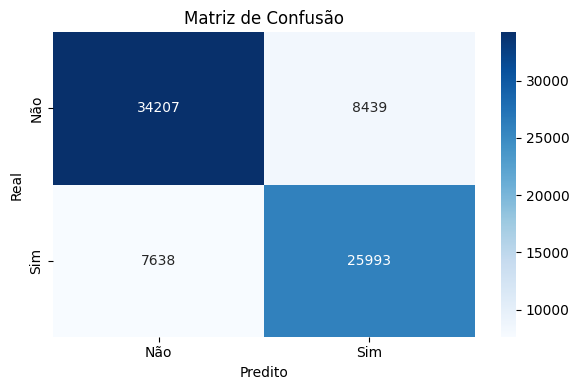

In [61]:
conf_matrix = confusion_matrix(results['y_true'], results['y_pred'])

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()